In [1]:
import pretty_midi
import IPython
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from DataAPI import MIDI_Dataset, DataAPI, piano_roll_to_pretty_midi
from MidiAPI import MidiAPI
from NetworkAPI3 import NetworkAPI

### Architektura

In [2]:
class LSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, unique_notes, seq_len):
        super().__init__()
        self.seq_len = seq_len
        self.hidden_dim = hidden_dim
        self.embeddings = nn.Embedding(unique_notes, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=3, dropout=0.2)
        self.linear = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(hidden_dim * seq_len, 512),
            nn.Linear(512, unique_notes))

    def forward(self, x):
        batch_size, _ = x.shape
        embeds = self.embeddings(x)
        lstm_out, _ = self.lstm(embeds.view(self.seq_len, batch_size, -1))
        outputs = self.linear(lstm_out.view(batch_size, -1))
        return outputs

### Parametry globalne

In [3]:
fps = 5
songs_in_batch = 8
batch_size = 128
lead = pretty_midi.instrument_name_to_program('Acoustic Grand Piano')
path = './bethoven_data/'

# Model1 -- s30_e64_h64

### Parametry

In [4]:
seq_len1 = 30
embedding_dim1 = 64
hidden_dim1 = 64

In [5]:
try:
    midi_dataset1 = MIDI_Dataset(path, fps=fps)
    data_api1 = DataAPI(midi_dataset1, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len1)
except:
    pass

### Trening

In [6]:
try:
    model1 = LSTM(embedding_dim=embedding_dim1, hidden_dim=hidden_dim1, unique_notes=data_api1.unique_notes_len, seq_len=seq_len1)
    network_api1 = NetworkAPI(model1, data_api1, 's30_e64_h64', optim.SGD(model1.parameters(), lr=0.1))
except:
    pass

In [7]:
try:
    network_api1.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 20000
Learning rate= 0.1
------------------------------------------------
| Iteration:   1 | Time:  18.52s | Loss:  9.35 |
------------------------------------------------
| Iteration: 1001 | Time: 153.53s | Loss:  7.38 |
------------------------------------------------
| Iteration: 2001 | Time: 153.13s | Loss:  7.84 |
------------------------------------------------
| Iteration: 3001 | Time: 157.37s | Loss:  8.00 |
------------------------------------------------
| Iteration: 4001 | Time: 145.34s | Loss:  8.03 |
------------------------------------------------
| Iteration: 5001 | Time: 153.67s | Loss:  7.75 |
------------------------------------------------
| Iteration: 6001 | Time: 147.64s | Loss:  8.47 |
------------------------------------------------
| Iteration: 7001 | Time: 149.24s | Loss:  7.69 |
------------------------------------------------
| Iteration: 8001 | Time: 148.11s | Loss:  7.27 |
-----------------------

### Zapis sample'a

In [8]:
network_api1.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api1.name_to_save)
midi_dataset1 = None
data_api1 = None

# Model2 -- s10_e64_h64

### Parametry

In [9]:
seq_len2 = 10
embedding_dim2 = 64
hidden_dim2 = 64

In [10]:
try:
    midi_dataset2 = MIDI_Dataset(path, fps=fps)
    data_api2 = DataAPI(midi_dataset2, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len2)
except:
    pass

### Trening

In [11]:
try:
    model2 = LSTM(embedding_dim=embedding_dim2, hidden_dim=hidden_dim2, unique_notes=data_api2.unique_notes_len, seq_len=seq_len2)
    network_api2 = NetworkAPI(model2, data_api2, 's10_e64_h64', optim.SGD(model2.parameters(), lr=0.1))
except:
    pass

In [12]:
try:
    network_api2.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 20000
Learning rate= 0.1
------------------------------------------------
| Iteration:   1 | Time:   3.62s | Loss:  9.35 |
------------------------------------------------
| Iteration: 1001 | Time: 135.44s | Loss:  8.32 |
------------------------------------------------
| Iteration: 2001 | Time: 132.71s | Loss:  8.42 |
------------------------------------------------
| Iteration: 3001 | Time: 129.27s | Loss:  8.05 |
------------------------------------------------
| Iteration: 4001 | Time: 132.99s | Loss:  7.64 |
------------------------------------------------
| Iteration: 5001 | Time: 135.07s | Loss:  7.95 |
------------------------------------------------
| Iteration: 6001 | Time: 134.54s | Loss:  8.34 |
------------------------------------------------
| Iteration: 7001 | Time: 134.00s | Loss:  8.33 |
------------------------------------------------
| Iteration: 8001 | Time: 134.49s | Loss:  7.74 |
-----------------------

### Zapis sample'a

In [13]:
network_api2.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api2.name_to_save)
midi_dataset2 = None
data_api2 = None

# Model3 -- s60_e64_h64

### Parametry

In [14]:
seq_len3 = 60
embedding_dim3 = 64
hidden_dim3 = 64

In [15]:
try:
    midi_dataset3 = MIDI_Dataset(path, fps=fps)
    data_api3 = DataAPI(midi_dataset3, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len3)
except:
    pass

File: ./bethoven_data\waldstein_3.mid is not a vaild MIDI file



### Trening

In [16]:
try:
    model3 = LSTM(embedding_dim=embedding_dim3, hidden_dim=hidden_dim3, unique_notes=data_api3.unique_notes_len, seq_len=seq_len3)
    network_api3 = NetworkAPI(model3, data_api3, 's60_e64_h64', optim.SGD(model3.parameters(), lr=0.1))
except:
    pass

In [17]:
try:
    network_api3.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 20000
Learning rate= 0.1
------------------------------------------------
| Iteration:   1 | Time:   5.38s | Loss:  9.32 |
------------------------------------------------
| Iteration: 1001 | Time: 154.42s | Loss:  7.94 |
------------------------------------------------
| Iteration: 2001 | Time: 152.73s | Loss:  7.51 |
------------------------------------------------
| Iteration: 3001 | Time: 154.60s | Loss:  8.36 |
------------------------------------------------
| Iteration: 4001 | Time: 154.09s | Loss:  7.49 |
------------------------------------------------
| Iteration: 5001 | Time: 155.20s | Loss:  7.89 |
------------------------------------------------
| Iteration: 6001 | Time: 158.42s | Loss:  7.92 |
------------------------------------------------
| Iteration: 7001 | Time: 157.54s | Loss:  7.33 |
------------------------------------------------
| Iteration: 8001 | Time: 158.97s | Loss:  7.49 |
-----------------------

### Zapis sample'a

In [18]:
network_api3.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api3.name_to_save)
midi_dataset3 = None
data_api3 = None

# Model4 -- s30_e128_h64

### Parametry

In [4]:
seq_len4 = 30
embedding_dim4 = 128
hidden_dim4 = 64

In [5]:
try:
    midi_dataset4 = MIDI_Dataset(path, fps=fps)
    data_api4 = DataAPI(midi_dataset4, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len4)
except:
    pass

### Trening

In [6]:
try:
    model4 = LSTM(embedding_dim=embedding_dim4, hidden_dim=hidden_dim4, unique_notes=data_api4.unique_notes_len, seq_len=seq_len4)
    network_api4 = NetworkAPI(model4, data_api4, 's30_e128_h64', optim.SGD(model4.parameters(), lr=0.1))
except:
    pass

In [7]:
try:
    network_api4.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 20000
Learning rate= 0.1
------------------------------------------------
| Iteration:   1 | Time:   9.37s | Loss:  9.35 |
------------------------------------------------
| Iteration: 1001 | Time: 147.26s | Loss:  8.24 |
------------------------------------------------
| Iteration: 2001 | Time: 143.81s | Loss:  8.28 |
------------------------------------------------
| Iteration: 3001 | Time: 145.36s | Loss:  8.57 |
------------------------------------------------
| Iteration: 4001 | Time: 147.71s | Loss:  8.00 |
------------------------------------------------
| Iteration: 5001 | Time: 157.50s | Loss:  8.33 |
------------------------------------------------
| Iteration: 6001 | Time: 180.01s | Loss:  7.12 |
------------------------------------------------
| Iteration: 7001 | Time: 159.10s | Loss:  6.88 |
------------------------------------------------
| Iteration: 8001 | Time: 157.28s | Loss:  8.32 |
-----------------------

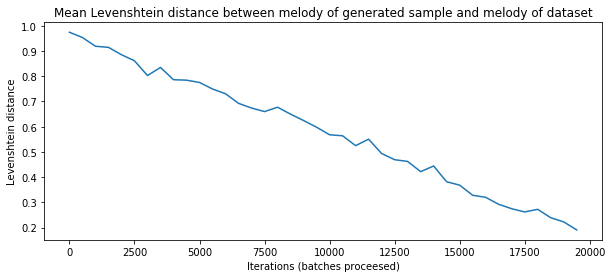

In [13]:
network_api4.plot_mean_levenshtain_distance()

d:\studia\mgu\midi_lstm_music_generation\venv\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
d:\studia\mgu\midi_lstm_music_generation\venv\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


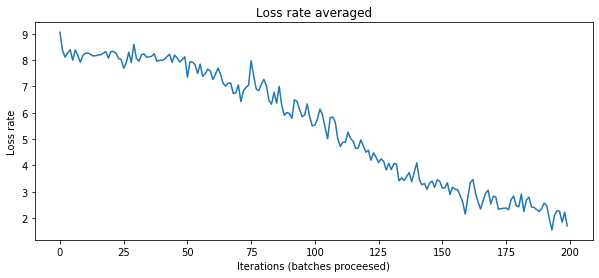

In [11]:
network_api4.plot_errors()

### Zapis sample'a

In [9]:
network_api4.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api4.name_to_save)
midi_dataset4 = None
data_api4 = None

# Model5 -- s30_e64_h128

### Parametry

In [ ]:
seq_len5 = 30
embedding_dim5 = 64
hidden_dim5 = 128

In [ ]:
try:
    midi_dataset5 = MIDI_Dataset(path, fps=fps)
    data_api5 = DataAPI(midi_dataset5, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len5)
except:
    pass

### Trening

In [ ]:
try:
    model5 = LSTM(embedding_dim=embedding_dim5, hidden_dim=hidden_dim5, unique_notes=data_api5.unique_notes_len, seq_len=seq_len5)
    network_api5 = NetworkAPI(model5, data_api5, 's30_e64_h128', optim.SGD(model5.parameters(), lr=0.1))
except:
    pass

In [ ]:
try:
    network_api5.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

### Zapis sample'a

In [ ]:
network_api5.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api5.name_to_save)
midi_dataset5 = None
data_api5 = None

# Model6 -- s30_e128_h128

### Parametry

In [ ]:
seq_len6 = 30
embedding_dim6 = 128
hidden_dim6 = 128

In [ ]:
try:
    midi_dataset6 = MIDI_Dataset(path, fps=fps)
    data_api6 = DataAPI(midi_dataset6, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len6)
except:
    pass

### Trening

In [ ]:
try:
    model6 = LSTM(embedding_dim=embedding_dim6, hidden_dim=hidden_dim6, unique_notes=data_api6.unique_notes_len, seq_len=seq_len6)
    network_api6 = NetworkAPI(model6, data_api6, 's30_e128_h128', optim.SGD(model6.parameters(), lr=0.1))
except:
    pass

In [ ]:
try:
    network_api6.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

### Zapis sample'a

In [ ]:
network_api6.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api6.name_to_save)
midi_dataset6 = None
data_api6 = None

# Model7 -- s30_e32_h64

### Parametry

In [ ]:
seq_len7 = 30
embedding_dim7 = 32
hidden_dim7 = 64

In [ ]:
try:
    midi_dataset7 = MIDI_Dataset(path, fps=fps)
    data_api7 = DataAPI(midi_dataset7, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len7)
except:
    pass

### Trening

In [ ]:
try:
    model7 = LSTM(embedding_dim=embedding_dim7, hidden_dim=hidden_dim7, unique_notes=data_api7.unique_notes_len, seq_len=seq_len7)
    network_api7 = NetworkAPI(model7, data_api7, 's30_e32_h64', optim.SGD(model7.parameters(), lr=0.1))
except:
    pass

In [ ]:
try:
    network_api7.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

### Zapis sample'a

In [ ]:
network_api7.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api7.name_to_save)
midi_dataset7 = None
data_api7 = None

# Model8 -- s30_e64_h32

### Parametry

In [ ]:
seq_len8 = 30
embedding_dim8 = 64
hidden_dim8 = 32

In [ ]:
try:
    midi_dataset8 = MIDI_Dataset(path, fps=fps)
    data_api8 = DataAPI(midi_dataset8, songs_in_batch=songs_in_batch, batch_size=batch_size, sequence_length=seq_len8)
except:
    pass

### Trening

In [ ]:
try:
    model8 = LSTM(embedding_dim=embedding_dim8, hidden_dim=hidden_dim8, unique_notes=data_api8.unique_notes_len, seq_len=seq_len8)
    network_api8 = NetworkAPI(model8, data_api8, 's30_e64_h32', optim.SGD(model8.parameters(), lr=0.1))
except:
    pass

In [ ]:
try:
    network_api8.train_loop(iterations=20000, verbose_every_iteration=1000, generate_every_iteration=500, song_len=100)
except:
    pass

### Zapis sample'a

In [ ]:
network_api8.generate_sample_midi(song_len = 30, temperature = 1.0, program = lead).write("samples/%s.mid" % network_api8.name_to_save)
midi_dataset8 = None
data_api8 = None